In [2]:
import nltk

In [4]:
#download shell
#this shell contains all the packages you need for NLP. You can downlaod all or just the one you need
#download the words package, for this exercise
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        C:\Users\aduko\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [6]:
#read the data with list comprehension
#stripped opened the file
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [8]:
print(len(messages))

5574


In [10]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [12]:
#check first 10 msgs and number with enumerate
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [14]:
#since the coc is a tab separation document '\t' as shown below
#realised data is tab separated
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
#parse into program with pandas
import pandas as pd

In [18]:
#specify that separator is \t
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [20]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#check stats
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
#what separates ham from spam messages
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [26]:
#check length of messages and add to DataFrame
messages['length'] = messages['message'].apply(len)

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#visualize length of messages
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='length', ylabel='Count'>

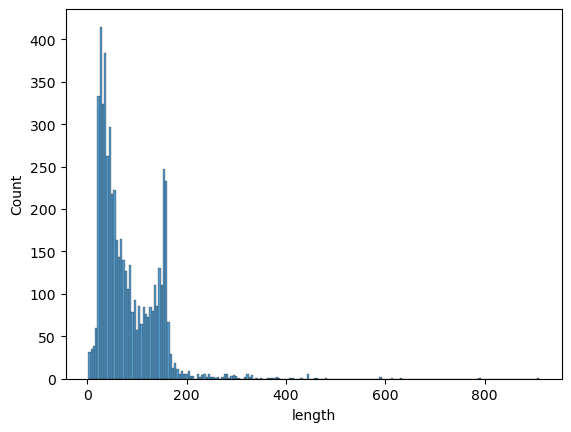

In [31]:
sns.histplot(messages, x=messages['length'], bins=200)

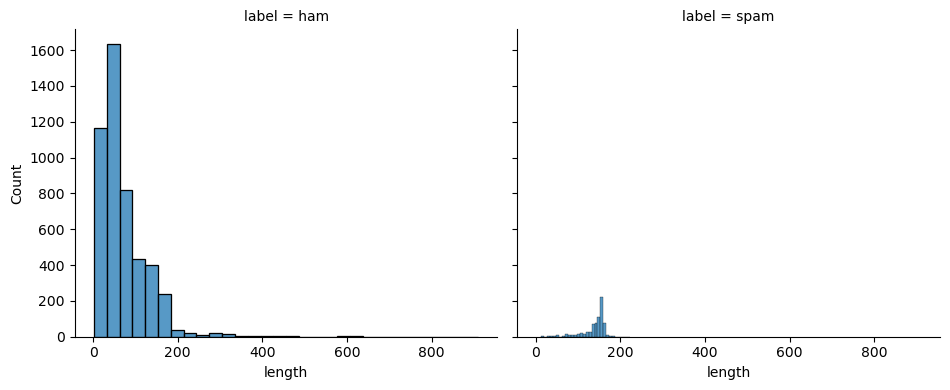

In [34]:
#check if message length is a distinguishing feature in ham vs spam
#always remeber to map when using FacetGrid
facet_grid = sns.FacetGrid(messages, col='label', height=4, aspect=1.2)

facet_grid.map(sns.histplot, 'length', bins=30, edgecolor='black')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

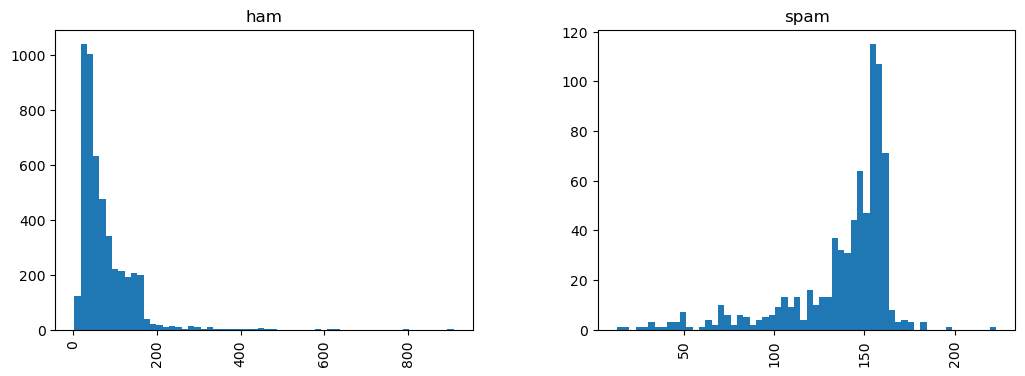

In [36]:
#create a pandas version of facet grid
messages.hist(column='length', by='label',bins=60, figsize=(12,4))

In [38]:
#convert raw messages(sequence of charcters) into vectors(sequence of numbers) format
#bag of words: where each unique word in the text is represented by one number

#step 1, a function to convert a sentence to a list of words
#remove very common words, aka, stop words, like the library we downloaded with th nltk download shell
#also use the string library in python
import string

In [40]:
from nltk.corpus import stopwords

In [55]:
'''
1. remove punctuations
2. remove stop words
3. return list of clean text word
'''

def text_process(msg):

    #build a list of characters from msg that aren’t punctuation
    no_punc = [char for char in msg if char not in string.punctuation]

    #join the list of characters back into a single string
    no_punc = ''.join(no_punc)

    #split the text into words and keep only those that aren’t common English stopwords
    return [word for word in no_punc.split() if word.lower not in stopwords.words('english')]

In [57]:
#check messages for tokenization
#tokenize: convert a list of text strings into a list oif tokens
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
#apply the function onto the first 10 rows of messages to check
messages['message'].head(10).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
5    [FreeMsg, Hey, there, darling, its, been, 3, w...
6    [Even, my, brother, is, not, like, to, speak, ...
7    [As, per, your, request, Melle, Melle, Oru, Mi...
8    [WINNER, As, a, valued, network, customer, you...
9    [Had, your, mobile, 11, months, or, more, U, R...
Name: message, dtype: object

## Vectorization


In [64]:
#step 1 count vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
#create a bag of words transformer, aka an instance of the CountVectorizer with own own analyzer, that is, the function we created, then fit it to the text data (the message column in our messages DataFrame)
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [72]:
#print total num of vocab words
print(len(bow_transformer.vocabulary_))

11747


In [78]:
#check the transformation for a message
msg4 = messages['message'][3]

In [80]:
print(msg4)

U dun say so early hor... U c already then say...


In [82]:
#check it vector transformation
bow4 = bow_transformer.transform([msg4])

In [86]:
print(bow4) #shows a sparse matrix of the message

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (1, 11747)>
  Coords	Values
  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [88]:
#check the shape
print(bow4.shape)

(1, 11747)


In [94]:
#check the words, appears at a particlur index in the vector
bow_transformer.get_feature_names_out()[4221] #that means the word 'U' appears 2 times

'U'

In [96]:
bow_transformer.get_feature_names_out()[9832]

'say'

In [98]:
#check the entire word count of the whole matrix. Message Bag of Words
msgs_bow = bow_transformer.transform(messages['message'])

In [100]:
print('SHape of Sparse Matrix: ', msgs_bow.shape)

SHape of Sparse Matrix:  (5572, 11747)


In [102]:
#check None Zero Occurences
msgs_bow.nnz

79463

In [107]:
#check the sparsity 
sparsity = (100.0 * msgs_bow.nnz / (msgs_bow.shape[0] * msgs_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [109]:
#remove round feature
sparsity = (100.0 * msgs_bow.nnz / (msgs_bow.shape[0] * msgs_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.12140229049026034


## Weight and Normalization
Done with TF-IDF: Term Frequency-Inverse Document Frequency

In [127]:
from sklearn.feature_extraction.text import TfidfTransformer

In [129]:
#create an instance of TfidFTransfomer, then fit it to my messages Bag of Words
tfidf_transformer = TfidfTransformer().fit(msgs_bow)

In [131]:
#check what it looks like on a single message, like we did with the CountVectorizer
tfidf4 = tfidf_transformer.transform(bow4)

In [133]:
#now we have an inversed document frequency and term frequency relationship for this message (vectorized message)
print(tfidf4) #these  numbers are like a weight value for each of these words

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (1, 11747)>
  Coords	Values
  (0, 4221)	0.3902711884065556
  (0, 4828)	0.25442769469153637
  (0, 5476)	0.2841540501592932
  (0, 6427)	0.28629349827015765
  (0, 6447)	0.3046289560740644
  (0, 7427)	0.41952836023632145
  (0, 9832)	0.5147493130794172
  (0, 10174)	0.19345051326676527
  (0, 10703)	0.2214828525636521


In [141]:
#check the inverse square frequency of a particular word form bag of words
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [143]:
#convert the entire bag of words corpus into a TF-IDF at once, same as the single message format but this time we parse in the entire thing
msgs_tfidf = tfidf_transformer.transform(msgs_bow)

In [145]:
#messages have been represented as numerical vectors
#we can now train the classifer. In this case, the Spam/Ham Classifier. We can use any kind of classification algo. 
#We will use Naïve Bayes here

from sklearn.naive_bayes import MultinomialNB

In [157]:
#create an instacne and fit messages label, the label contains either ham or spam, and thats what we are trying to detect
spam_detection_model = MultinomialNB().fit(msgs_tfidf, messages['label'])

In [161]:
#test model on one message, tfidf4 in this case
spam_detection_model.predict(tfidf4)[0]

'ham'

In [163]:
#test to see if the model åpredicted correctly
messages['label'][3]

'ham'

In [165]:
#model was train and tested with the same data, no train_test_split. 
#lest do that to properly train and test the model
from sklearn.model_selection import train_test_split

In [167]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'], test_size=0.2, random_state=101)

In [173]:
# run model again in scikit learn's inbuilt pipeline to store the entire pipeline of my workflow
from sklearn.pipeline import Pipeline

In [175]:
#create an instance of pipeline, whic takes the steps arguement
#first arguement is a tuple which takes the name of the step, CountVectorizer, and we gave it a name Bag of Words
#second step is to call the TF-IDF transformer
#call the moel to train on
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)), ('tfidf', TfidfTransformer()) , ('classifier', MultinomialNB())])

In [177]:
#just like any train process, you fit it to the training data
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020322AC1300>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [179]:
#lets predict on my test data
predictions = pipeline.predict(msg_test)

In [181]:
#lets do a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [183]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       980
        spam       1.00      0.59      0.74       135

    accuracy                           0.95      1115
   macro avg       0.97      0.79      0.86      1115
weighted avg       0.95      0.95      0.94      1115



[[980   0]
 [ 56  79]]
